# Investigating the Relationship between *Crash Types* and Odds of Roundabout vs. Intersection Crash

In [ ]:
# install dependencies
!pip install numpy matplotlib scipy pandas seaborn pingouin

In [13]:
# import directives
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_rel
import pingouin as pt

In [19]:
# Preprocessing -- should be general-purpose
# load data
intersection = pd.read_csv("crash_type_intersection.csv").replace(',','', regex=True).fillna(0)
roundabout = pd.read_csv("crash_type_roundabout.csv").replace(',','', regex=True).fillna(0)

# Parse crash year and date
month_map = {
    "January": "1",
    "February": "2",
    "March": "3",
    "April": "4",
    "May": "5",
    "June": "6",
    "July": "7",
    "August": "8",
    "September": "9",
    "October": "10",
    "November": "11",
    "December": "12"
}
intersection['Crash Month'] = intersection['Crash Month'].map(month_map)
intersection['Crash Date'] = pd.to_datetime(intersection['Crash Year'] + "/" + intersection['Crash Month'] + "/01")
intersection.drop(['Crash Year', 'Crash Month'], axis=1, inplace=True)
roundabout['Crash Month'] = roundabout['Crash Month'].map(month_map)
roundabout['Crash Date'] = pd.to_datetime(roundabout['Crash Year'] + "/" + roundabout['Crash Month'] + "/01")
roundabout.drop(['Crash Year', 'Crash Month'], axis=1, inplace=True)

## Analysis of Head-On Left-Turn Crashes

In [20]:
# Pick only relevant data columns
inter_head_on = intersection.filter(['Crash Date', 'Head-On - Left Turn', 'Total'])
round_head_on = roundabout.filter(['Crash Date', 'Head-On - Left Turn', 'Total'])

In [21]:
inter_head_on['Intersection %'] = inter_head_on['Head-On - Left Turn'].astype(float) / inter_head_on['Total'].astype(float)
inter_head_on.drop(['Head-On - Left Turn', 'Total'], axis=1, inplace=True)
round_head_on['Roundabout %'] = round_head_on['Head-On - Left Turn'].astype(float) / round_head_on['Total'].astype(float)
round_head_on.drop(['Head-On - Left Turn', 'Total'], axis=1, inplace=True)

In [22]:
# Aggregate data
head_on_agg = pd.merge(inter_head_on, round_head_on, on=['Crash Date'])

# save aggregated values for later and remove them from table
head_on_avg = head_on_agg.iloc[len(head_on_agg) - 1].to_dict()

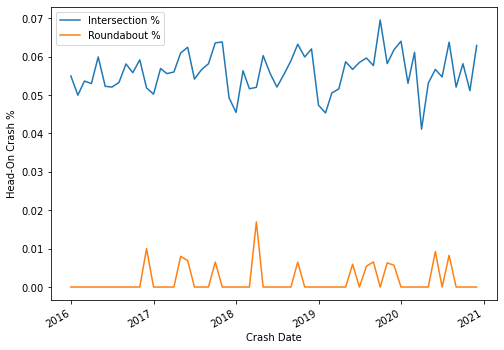

In [24]:
# plot data
head_on_agg.plot(x='Crash Date', kind='line', ylabel="Head-On Crash %", figsize=(8,6))
plt.savefig('head-on.png')

In [25]:
# perform t-test on the conditional probability of the evidence's occurrence
pt.ttest(head_on_agg['Intersection %'], head_on_agg['Roundabout %'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,73.920392,60,two-sided,1.229554e-60,"[0.05, 0.06]",12.109788,6.564e+56,1.0


In [27]:
# compute Bayes' factor for impact of evidence on roundabout crash vs intersection crash odds
print(head_on_avg['Roundabout %'] / head_on_avg['Intersection %'])

0.03740786141711963


### Conclusion

Given that the $t$-test yielded the $p$-value of $1.23 \times 10^{-60} < 0.05$, we reject the null hypothesis, and come to the conclusion that
**head-on crashes from the left** does constitute a statistically significant characteristic to the occurrence of traffic crashes in roundabouts.

This difference can be quantified by the Bayes' factor of 0.037.


## Analysis of Same-Direction Sideswipe Crashes

In [28]:
# Pick only relevant data columns
inter_sw = intersection.filter(['Crash Date', 'Sideswipe - Same Direction', 'Total'])
round_sw = roundabout.filter(['Crash Date', 'Sideswipe - Same Direction', 'Total'])

In [29]:
inter_sw['Intersection %'] = inter_sw['Sideswipe - Same Direction'].astype(float) / inter_sw['Total'].astype(float)
inter_sw.drop(['Sideswipe - Same Direction', 'Total'], axis=1, inplace=True)
round_sw['Roundabout %'] = round_sw['Sideswipe - Same Direction'].astype(float) / round_sw['Total'].astype(float)
round_sw.drop(['Sideswipe - Same Direction', 'Total'], axis=1, inplace=True)

In [30]:
# Aggregate data
sw_agg = pd.merge(inter_sw, round_sw, on=['Crash Date'])

# save aggregated values for later and remove them from table
sw_avg = sw_agg.iloc[len(sw_agg) - 1].to_dict()

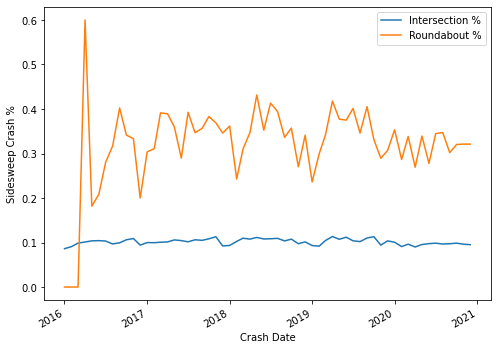

In [31]:
# plot data
sw_agg.plot(x='Crash Date', kind='line', ylabel="Sidesweep Crash %", figsize=(8,6))
plt.savefig('sidesweep.png')

In [32]:
# perform t-test on the conditional probability of the evidence's occurrence
pt.ttest(sw_agg['Intersection %'], sw_agg['Roundabout %'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-18.297462,60,two-sided,3.154443e-26,"[-0.24, -0.19]",3.203744,1.112e+23,1.0


In [34]:
# compute Bayes' factor for impact of evidence on roundabout crash vs intersection crash odds
print(sw_avg['Roundabout %'] / sw_avg['Intersection %'])

3.3357475405416404


### Conclusion

Given that the $t$-test yielded the $p$-value of $3.15 \times 10^{-26} < 0.05$, we reject the null hypothesis, and come to the conclusion that
**sidesweep crashes** does constitute a statistically significant characteristic to the occurence of traffic crashes in roundabouts.

This difference can be quantified by the Bayes' factor of 3.336.